In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [8]:
day0 = pd.read_csv('round1/prices_round_1_day_0.csv', sep=";")
day1 = pd.read_csv('round1/prices_round_1_day_-1.csv', sep=";")
day2 = pd.read_csv('round1/prices_round_1_day_-2.csv', sep=";")

day2['timestamp'] = day2['timestamp'] 
day1['timestamp'] = (day1['timestamp'] + 1000000) 
day0['timestamp'] = (day0['timestamp'] + 2000000) 

In [9]:
df = pd.concat([day2, day1, day0])
df_b = df[df['product'] == "BANANAS"]
df_p = df[df['product'] == "PEARLS"]

df_b.set_index('timestamp', inplace=True)
df_p.set_index('timestamp', inplace=True)

df_b.index = df_b.index.astype('int64')
df_p.index = df_p.index.astype('int64')

In [10]:
df_b

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-2,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
100,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
200,-2,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621
300,-2,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762
400,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,0,BANANAS,4869,28,NaN,NaN,NaN,NaN,4872,6,4874.0,6.0,4876.0,28.0,4870.5,126424.000000
2999600,0,BANANAS,4869,29,NaN,NaN,NaN,NaN,4870,1,4874.0,3.0,4876.0,29.0,4869.5,125984.000000
2999700,0,BANANAS,4875,1,4870.0,2.0,4869.0,24.0,4876,26,NaN,NaN,NaN,NaN,4875.5,123508.000000


In [11]:
import statsmodels.api as sm

arima_model = sm.tsa.arima.ARIMA(df_b['mid_price'], order=(2,1,2))
model = arima_model.fit()
print(model.summary())

/Users/jwoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              mid_price   No. Observations:                30000
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -51882.560
Date:                Wed, 22 Mar 2023   AIC                         103775.119
Time:                        00:49:55   BIC                         103816.664
Sample:                             0   HQIC                        103788.449
                              - 30000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7525      0.193     -3.890      0.000      -1.132      -0.373
ar.L2          0.0215      0.008      2.711      0.007       0.006       0.037
ma.L1          0.0428      0.193      0.222      0.8

/Users/jwoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


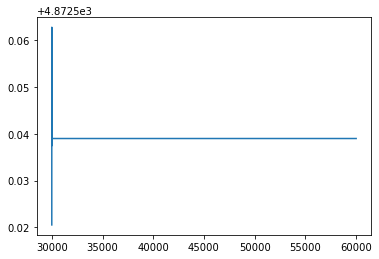

In [12]:
plt.plot(model.forecast(len(df_b)))

In [13]:
from statsmodels.graphics.tsaplots import plot_predict

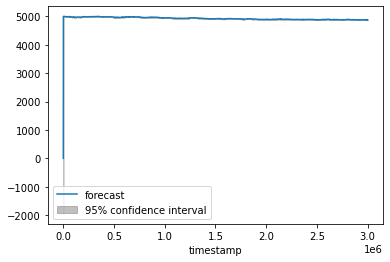

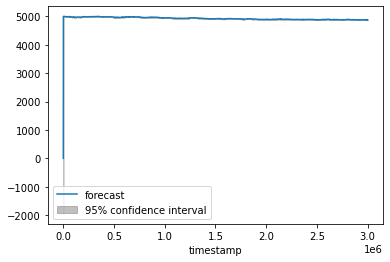

In [14]:
plot_predict(model)

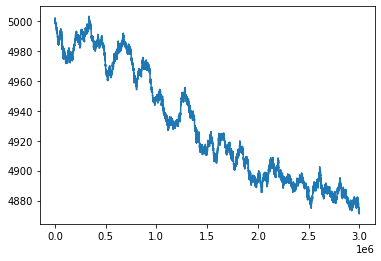

In [15]:
plt.plot(model.predict()[1:])

<AxesSubplot:xlabel='timestamp'>

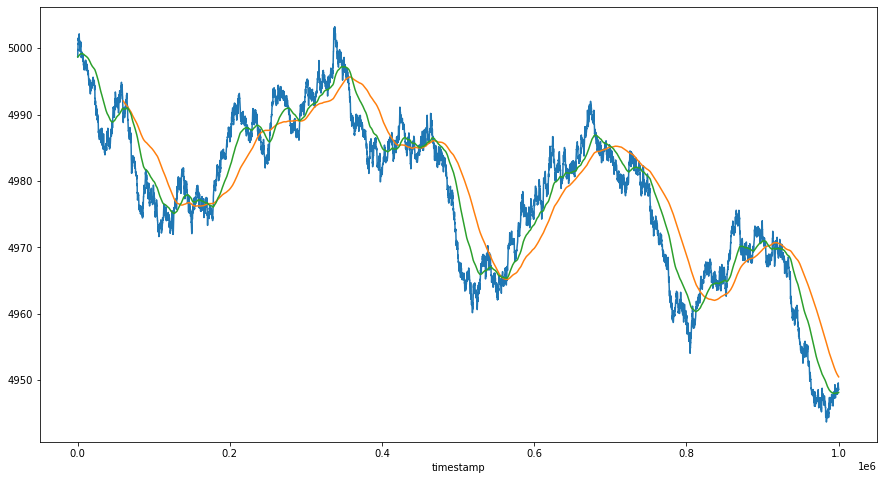

In [17]:
plt.figure(figsize=(15,8))
arima_predict = pd.Series(model.predict()[1:])[1:10000]

plt.plot(arima_predict)


arima_predict.rolling(window=600).mean().plot()
arima_predict.ewm(span=300, adjust=False).mean().plot()

In [97]:
arima_predict.rolling(window=100).mean()

timestamp
200              NaN
300              NaN
400              NaN
500              NaN
600              NaN
            ...     
59700    4992.547445
59800    4992.513196
59900    4992.479953
60000    4992.439435
60100    4992.408895
Name: predicted_mean, Length: 600, dtype: float64

In [ ]:
pd.Series(model.predict()[1:])

In [ ]:
arima_predict.rolling(window=920).mean()

In [ ]:
arima_predict.ewm(span=900, adjust=False).mean().values

In [68]:
simple_ma = arima_predict.rolling(window=920).mean().dropna()

orange_x = simple_ma.index.values
orange_y = simple_ma.values

ex_ma = arima_predict.ewm(span=900, adjust=False).mean()
blue_x = ex_ma.index.values
blue_y = ex_ma.values

In [73]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p = np.poly1d(np.polyfit(orange_x, orange_y, 30))

/Users/dwww/miniforge3/envs/imc/lib/python3.8/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/dwww/miniforge3/envs/imc/lib/python3.8/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [69]:
p(orange_x)

array([4978.13816363, 4978.14824561, 4978.15831624, ..., 4876.52856017,
       4876.51819407, 4876.50781701])

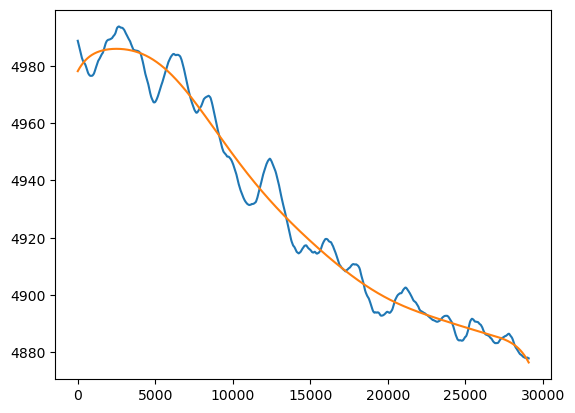

In [70]:
plt.plot(orange_y)
plt.plot(p(orange_x))